# Linear Regression

## module / library import

In [1]:
import torch
import numpy as np
from torch.autograd import Variable
from torch import nn
import matplotlib.pyplot as plt

%matplotlib inline
torch.manual_seed(1) #1.

1. Sets the seed for generating random numbers. Returns a torch._C.Generator object.

## Prepare data

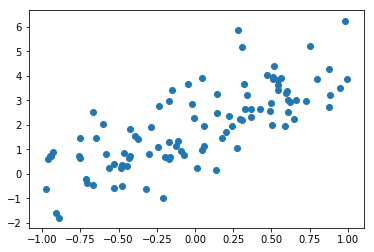

In [2]:
sample_size = 100
x = torch.FloatTensor(sample_size, 1).uniform_(-1, 1) #1.
y = 2*x+2+ torch.randn(x.size()) #2.
plt.scatter(x.data.numpy(), y.data.numpy()) #3.
plt.show()

1. x : [-1, 1] 범위의 100*1 크기의 정규화 된 텐서
2. y : x 크기 만큼의 행렬을 만들고 2*x+2 의 값 입력
3. x, y 그림 그리기

## Linear Regression Model w / nn Module

In [3]:
model = nn.Linear(1, 1, bias=True) #1. wx + b
print(model)

model.weight, model.bias # model object is holding all necessary variables

Linear(in_features=1, out_features=1, bias=True)


(Parameter containing:
 tensor([[0.7392]], requires_grad=True), Parameter containing:
 tensor([-0.7216], requires_grad=True))

1. model 정의 -> model은 wx + b로 정의한다.

In [4]:
cost_func = nn.MSELoss() #1. Mean squared Cost function
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05) #2. SGD optimizer

1. cost func은 MSE Loss로 계산한다.
2. SGD 옵티마이저를 사용, 인풋으로는 model.parameters를 넣어주고 learning rate는 0.05로 지정

## Training Your Model w / optim Module

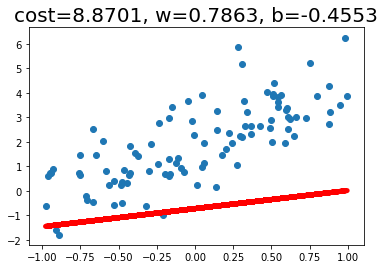

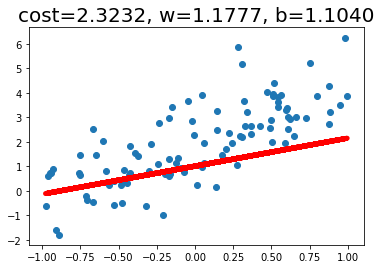

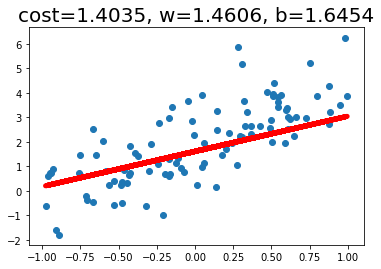

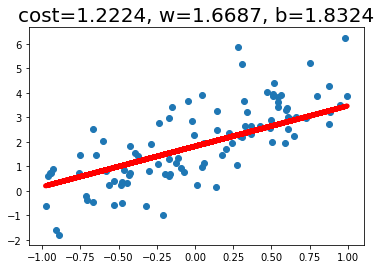

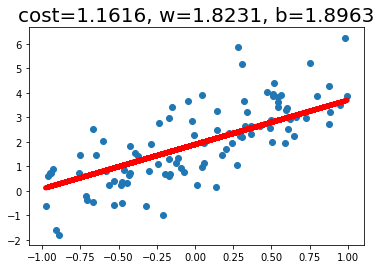

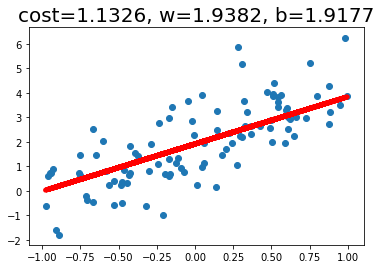

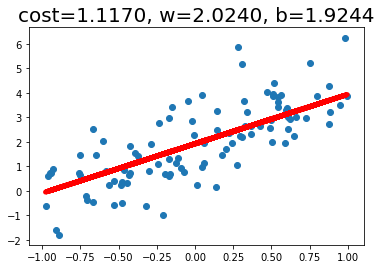

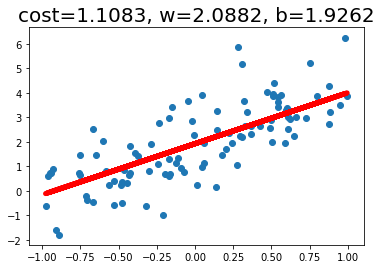

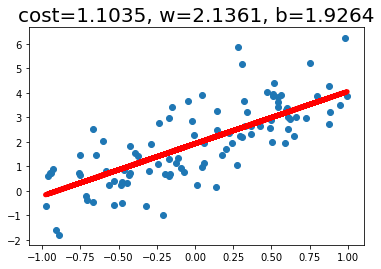

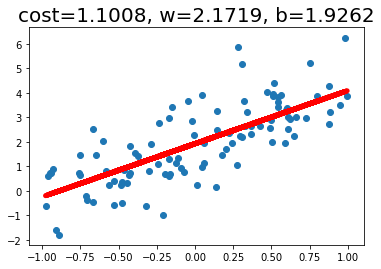

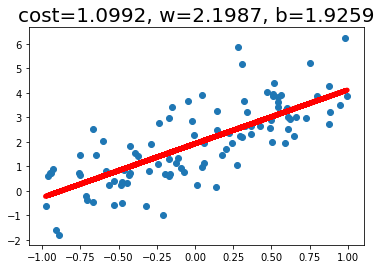

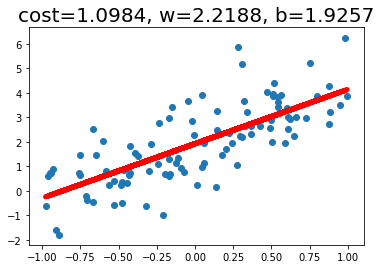

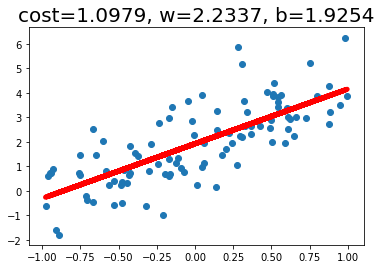

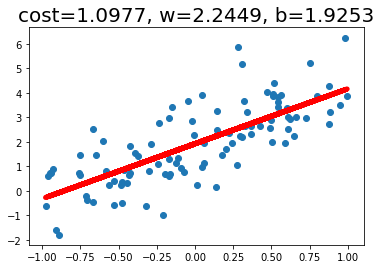

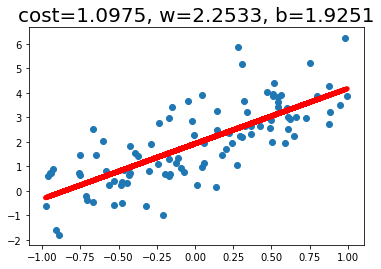

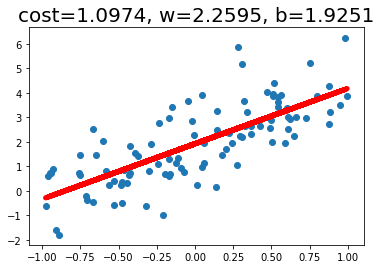

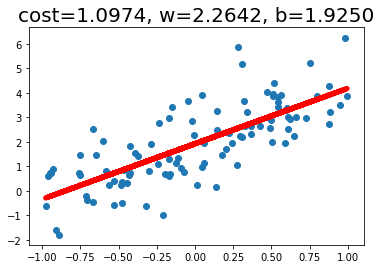

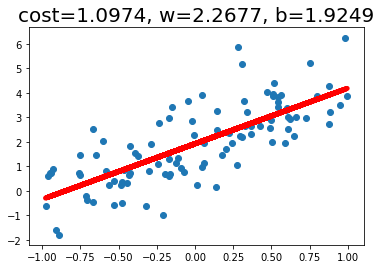

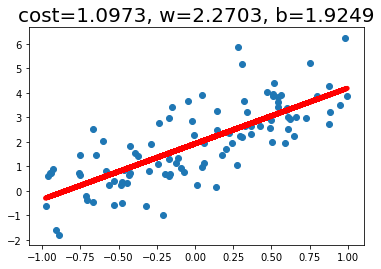

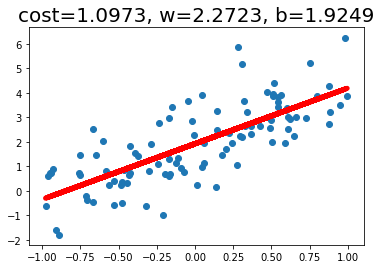

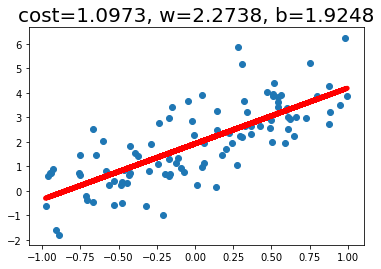

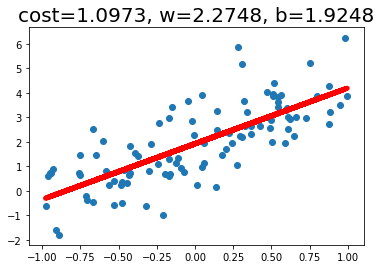

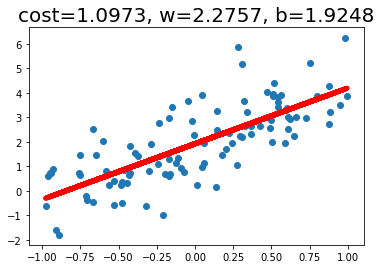

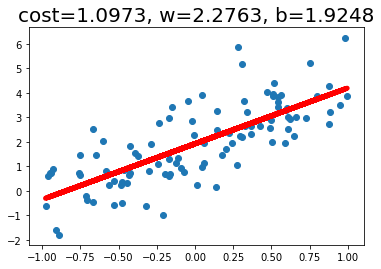

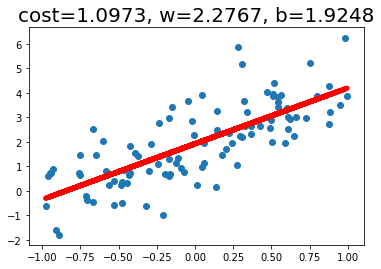

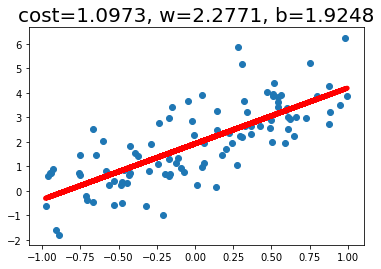

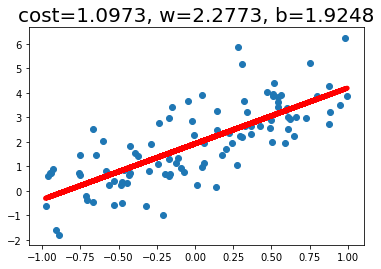

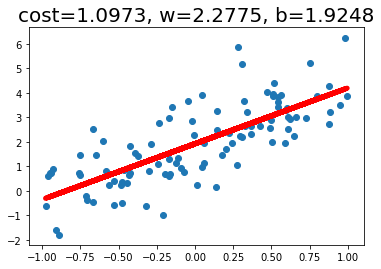

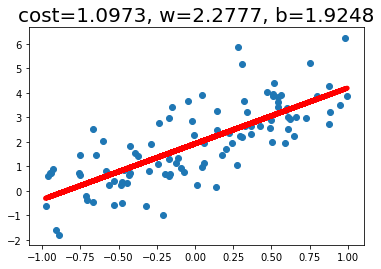

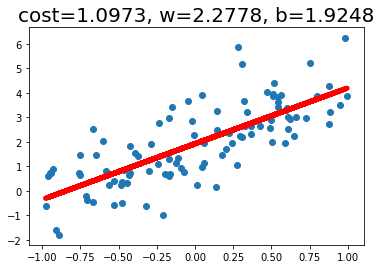

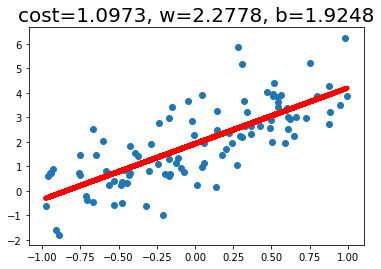

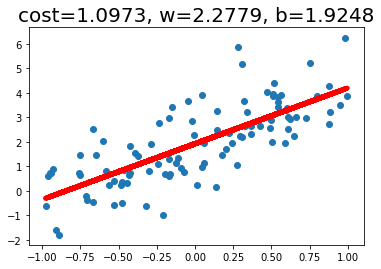

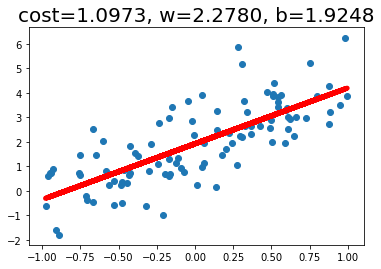

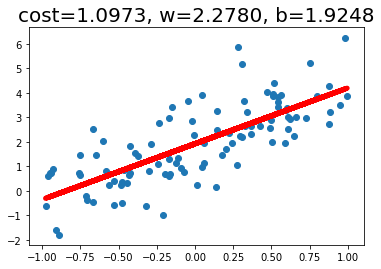

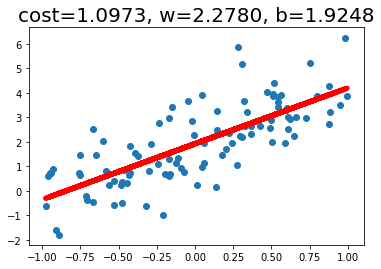

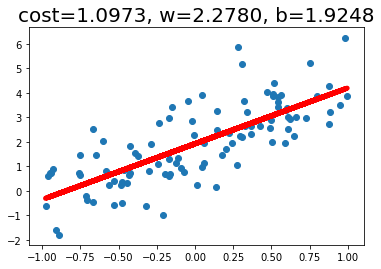

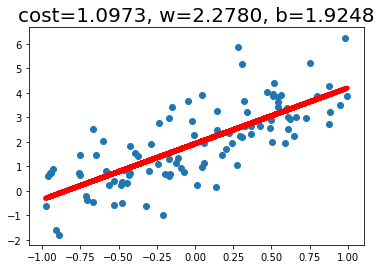

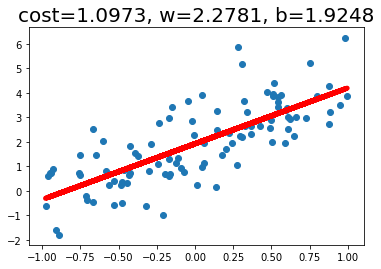

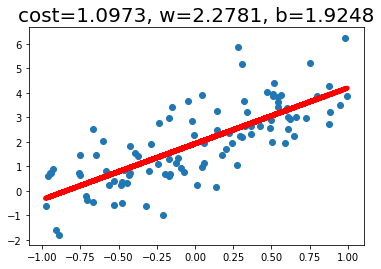

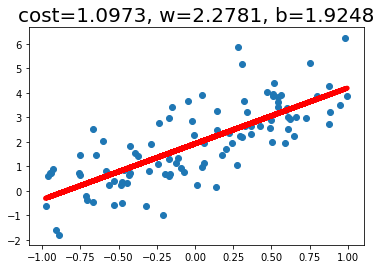

Linear Model Optimization is Done!


In [5]:
plt.ion() #1.

max_epoch = 400

for step in range(max_epoch):
    
    prediction = model(x) #2. input x and predict based on x
    cost = cost_func(prediction, y) #3.
    
    optimizer.zero_grad() #4.
    cost.backward() #5.
    optimizer.step() #6.
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.item(), 
                    model.weight.item(), model.bias.item()), fontdict = {'size' : 20})
        plt.show()
        plt.pause(0.1)
        
print('Linear Model Optimization is Done!')

plt.ioff() #7.

1. plot을 갱신하기 위해 plt.ion()과 7.의 plt.ioff()를 맞춰주나, 있고 없고의 차이는 잘 모르겠음
2. prediction 변수에 위에서 정의한 wx+b의 모델 결과 값을 입력
3. cost에는 모델 결과(prediction)과 정답(y)간의 MSE Loss 값을 입력
4. 옵티마이저 초기화(for next training)
5. compute gradient value of parameters
6. update gradient

In [6]:
model.state_dict() #1.

OrderedDict([('weight', tensor([[2.2781]])), ('bias', tensor([1.9248]))])

1. 학습된 model 파라미터 출력

## Prediction (Test)

In [7]:
x_test = torch.Tensor(([1])) #1.
y_test = model(x_test) #2.

print('input : %.4f, output : %.4f' % (x_test.item(), y_test.item()))

input : 1.0000, output : 4.2028


1. x_test에 1을 원소로 가지는 tensor 입력
2. y_test에 x_test를 입력값으로 하는 model 결과값 입력

## Draw Sample from Our Generative Model

In [8]:
x_test = torch.FloatTensor(sample_size, 1).uniform_(-1, 1) #1.
y_test = model(x_test) + Variable(torch.randn(x.size())) #2.

1. x_test에 100*1 크기의 행렬을 만들고 -1 ~ 1로 정규화된 텐서를 입력한다.
2. 모델에 x_test 넣고 결과값 출력, 뒤의 Variable은 pytorch 신규 버전에서 사라질 것임

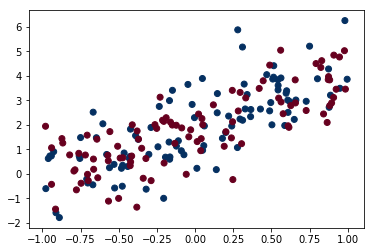

In [9]:
plt.scatter(torch.cat((x, x_test)).data.numpy(), torch.cat((y,y_test)).data.numpy(),
   c = np.expand_dims(np.append(np.ones(sample_size), np.zeros(sample_size)), axis=1), cmap='RdBu') #1.
plt.show()

1. 중간의 expand_dims는 새로운 축을 추가할 때 사용한다.(색을 달리하여 비교하기 위하여...)
   쓰지 않고 그냥 그리게 되면 아래와 같이 출력된다.

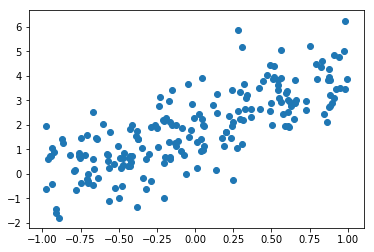

In [11]:
plt.scatter(torch.cat((x, x_test)).data.numpy(), torch.cat((y,y_test)).data.numpy())